In [1]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# put path to TRN skeletons here
initial_matrix_folder = "/Users/elizabethchang/Library/CloudStorage/GoogleDrive-ec3055@columbia.edu/My Drive/final projects CBMFW4761 BINFG4002/data/c9als data/cohort atac and rna/results/initial adjacency matrix"

# put path to predicted skeletons here
final_matrix_folder = "/Users/elizabethchang/Library/CloudStorage/GoogleDrive-ec3055@columbia.edu/My Drive/final projects CBMFW4761 BINFG4002/data/c9als data/cohort atac and rna/results/final adjacency matrix"

GENE_ALS_ATAC_Exc_subset (44, 45) (44, 45)
COMBO_ALS_ATAC_Exc_subset (44, 45) (44, 45)


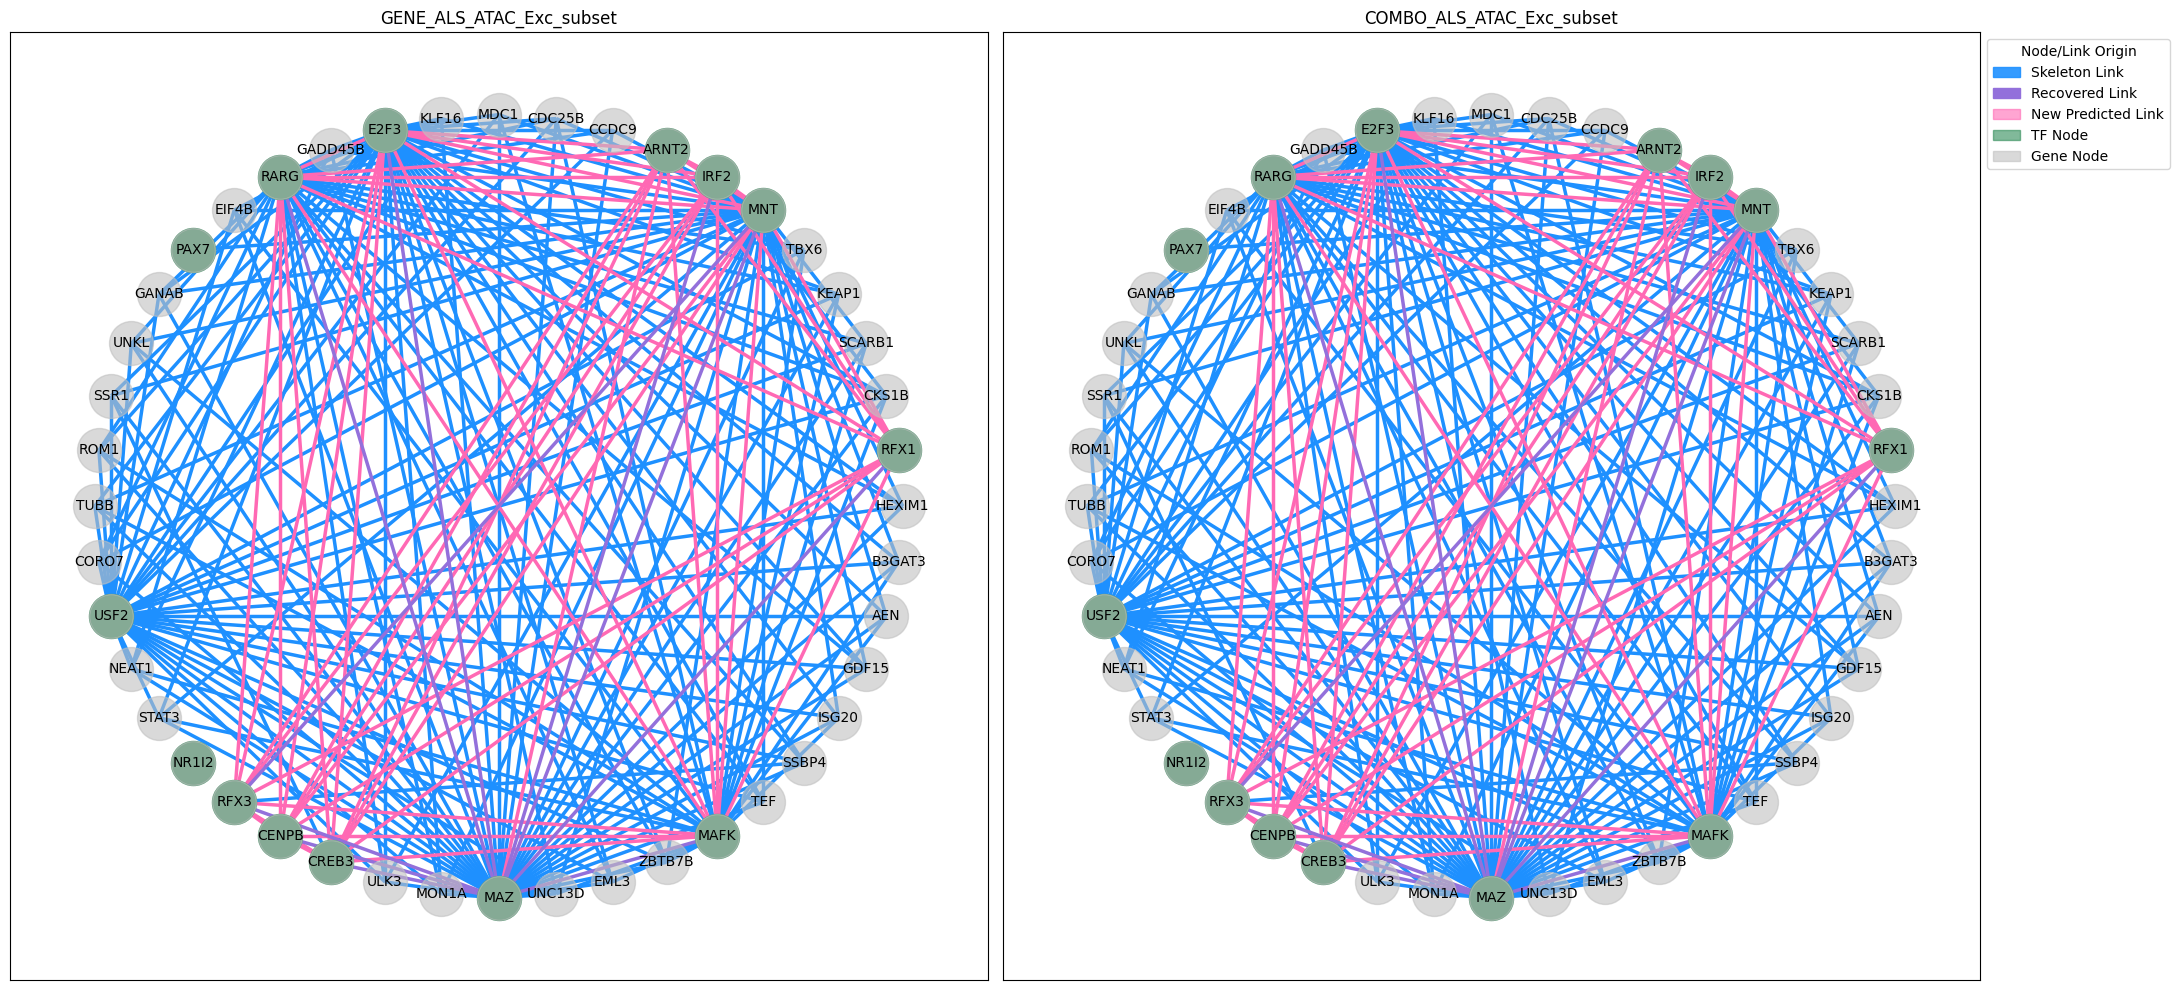

ALS_ATAC_Exc_subset (14, 15) (14, 15)
RNASEQ_ALS_ATAC_Exc_subset (14, 15) (14, 15)


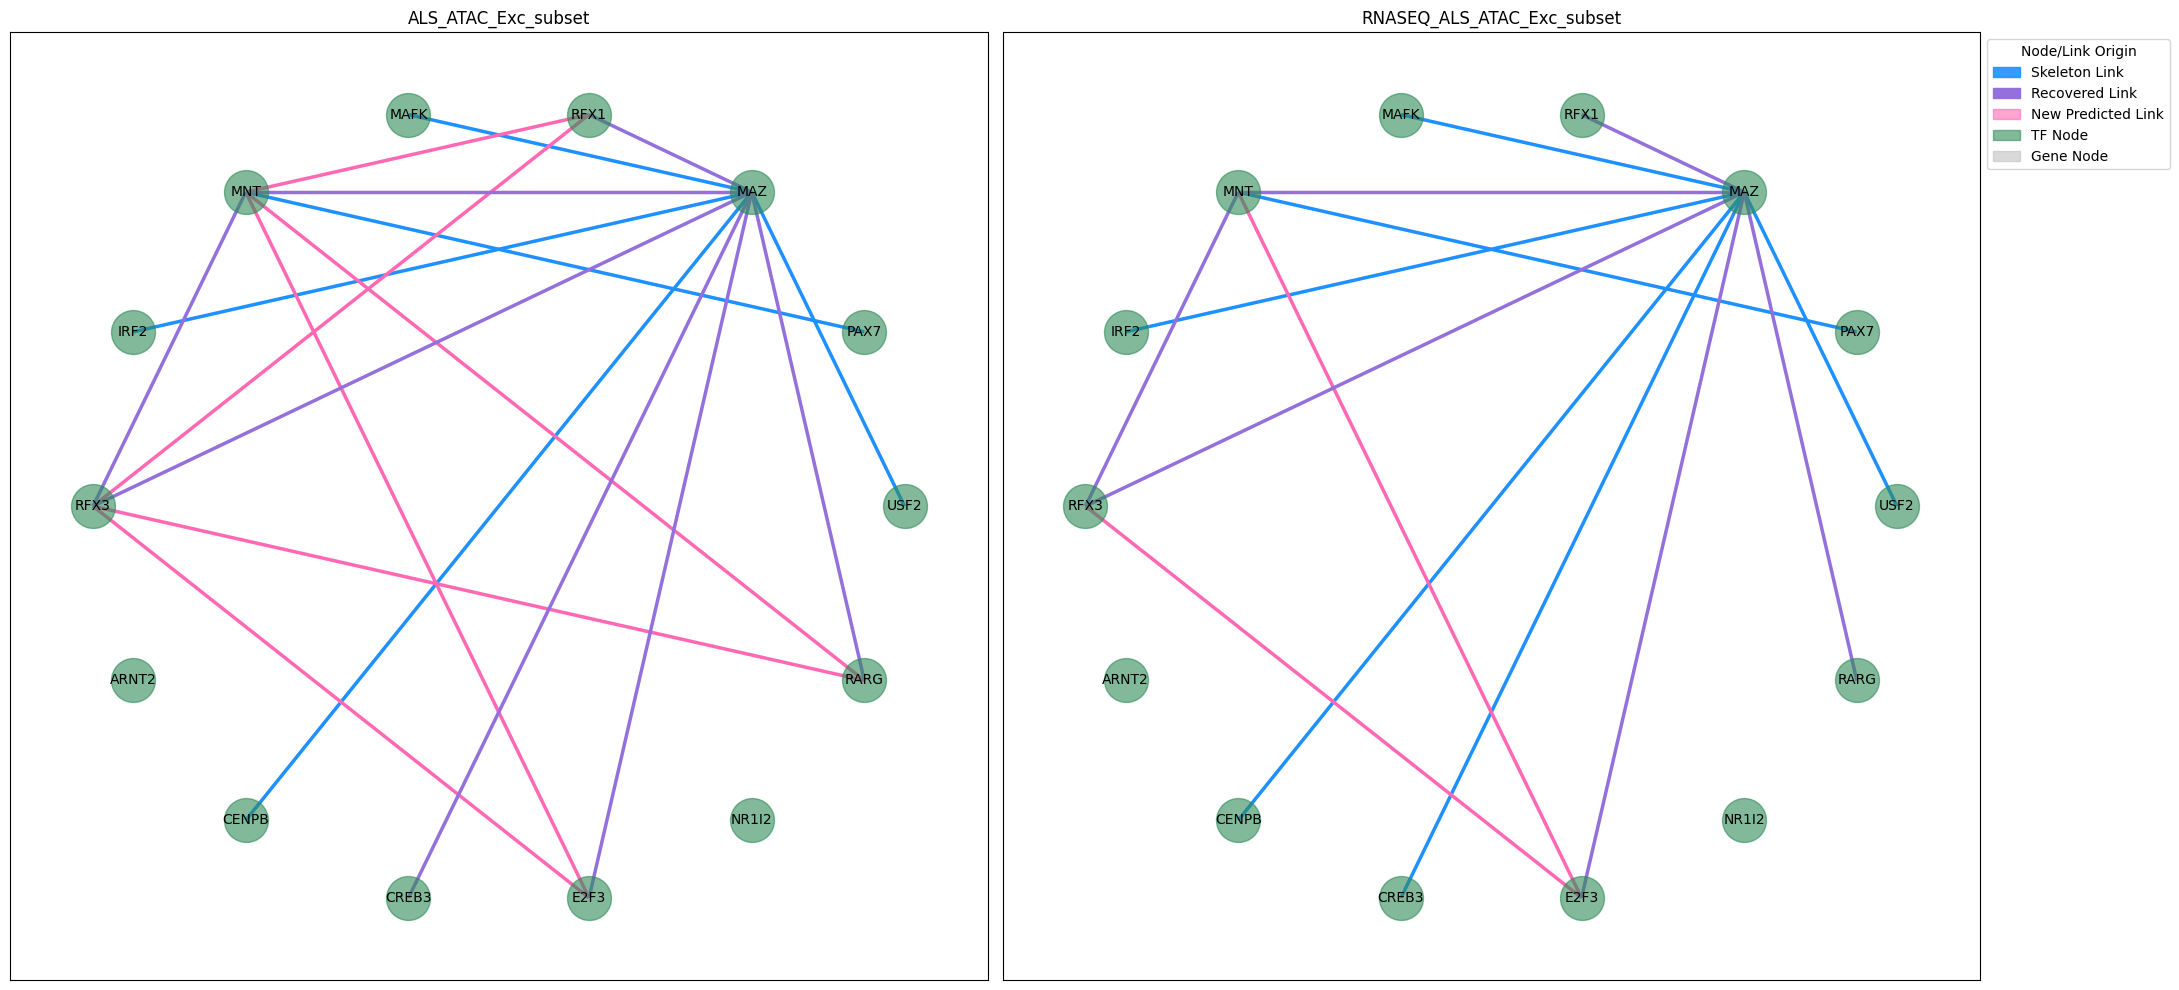

GENE_Control_ATAC_Exc_subset_AllPeaks (14, 15) (14, 15)
COMBO_Control_ATAC_Exc_subset_AllPeaks (14, 15) (14, 15)


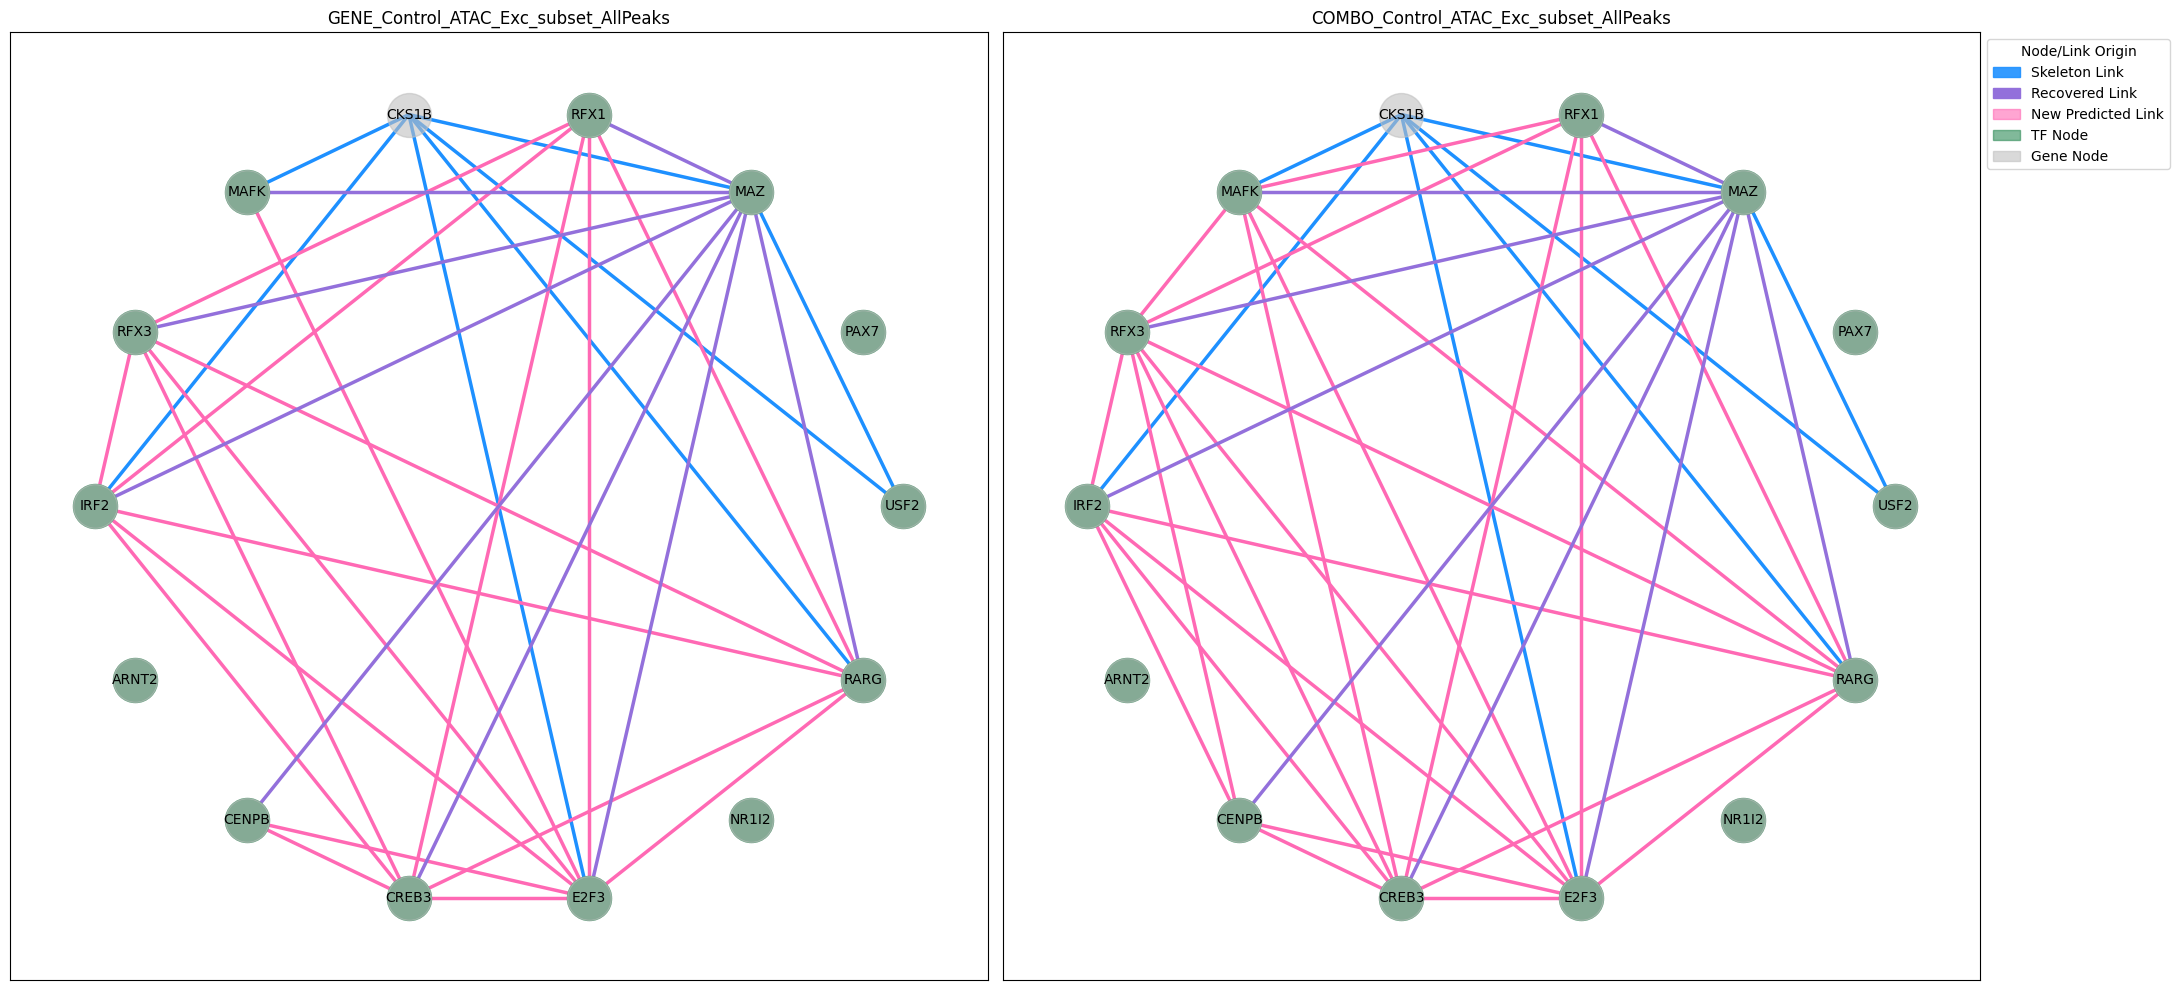

ALS_ATAC_Astro_subset (19, 20) (19, 20)
RNASEQ_ALS_ATAC_Astro_subset (19, 20) (19, 20)


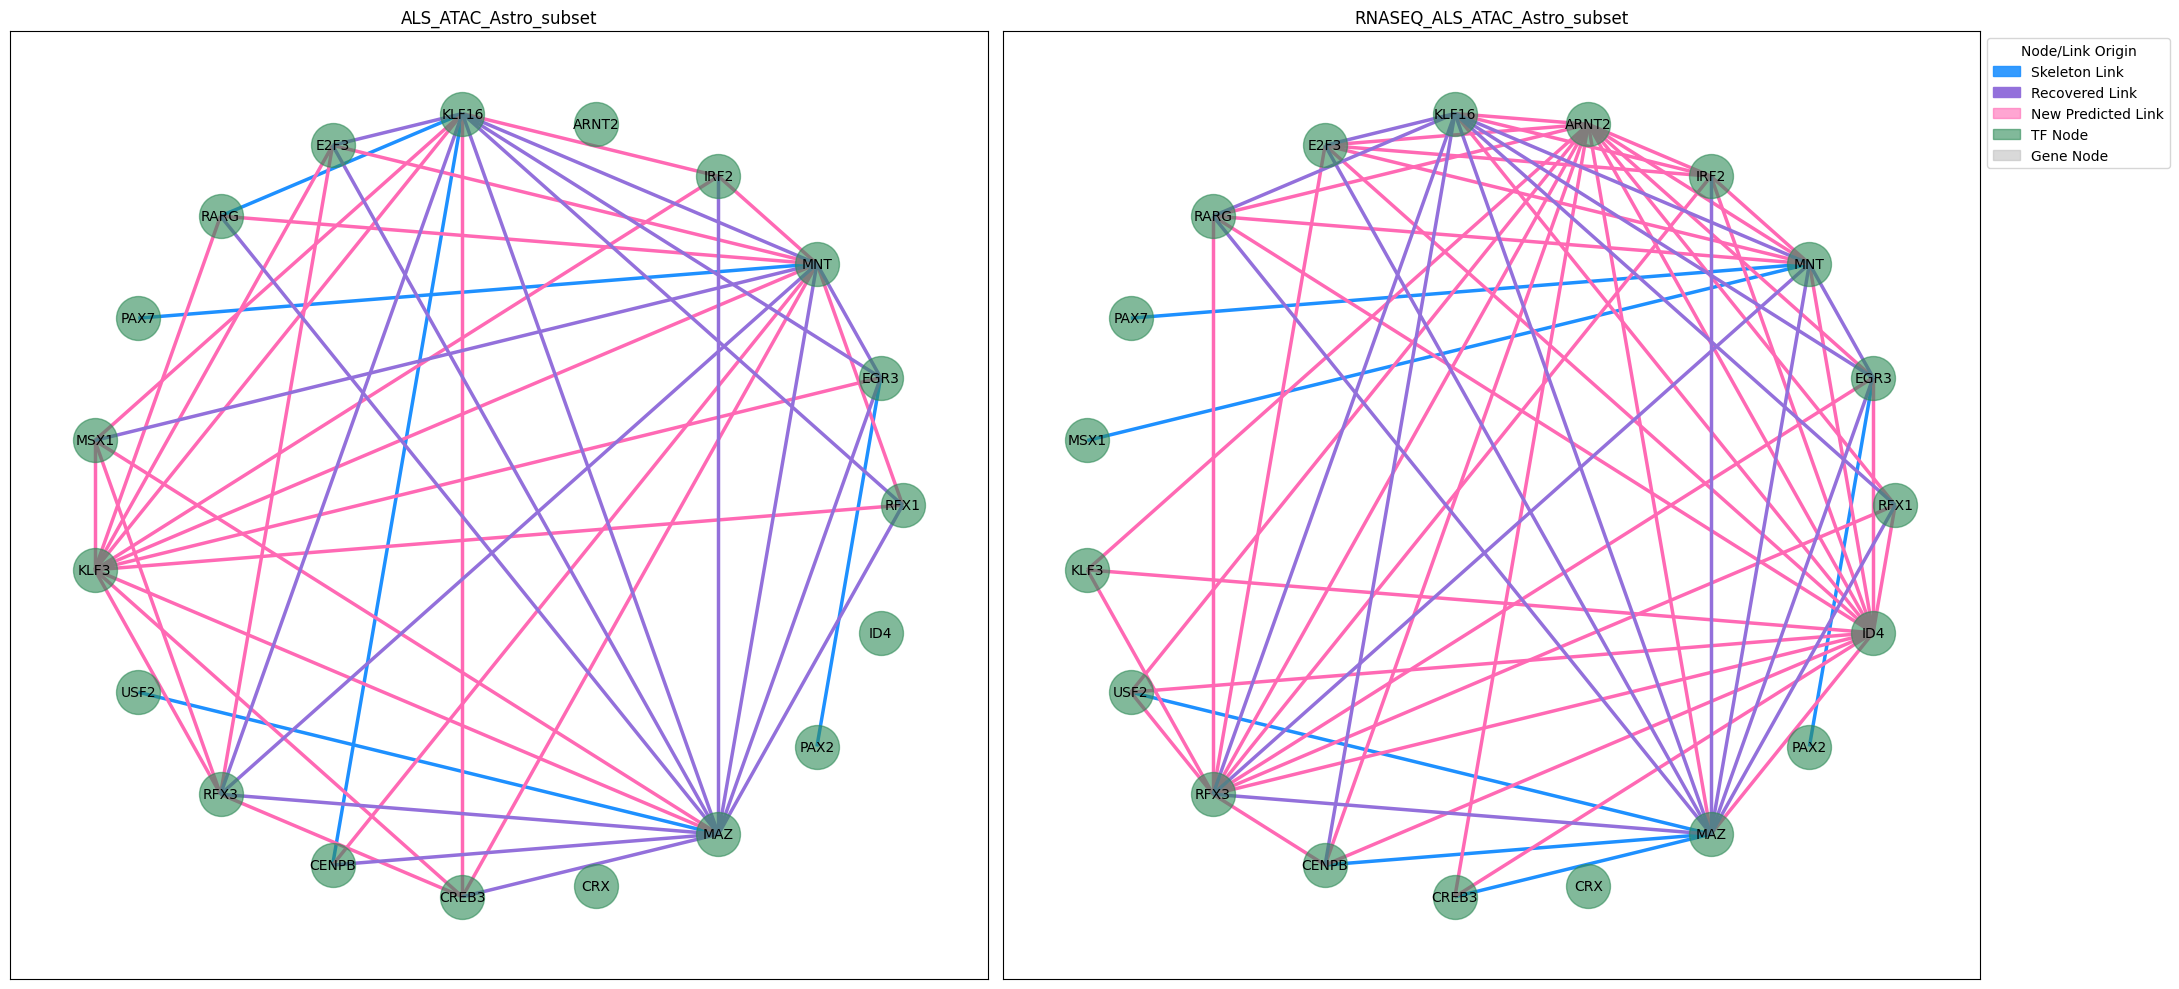

GENE_Control_ATAC_Astro_subset (24, 25) (24, 25)
COMBO_Control_ATAC_Astro_subset (24, 25) (24, 25)


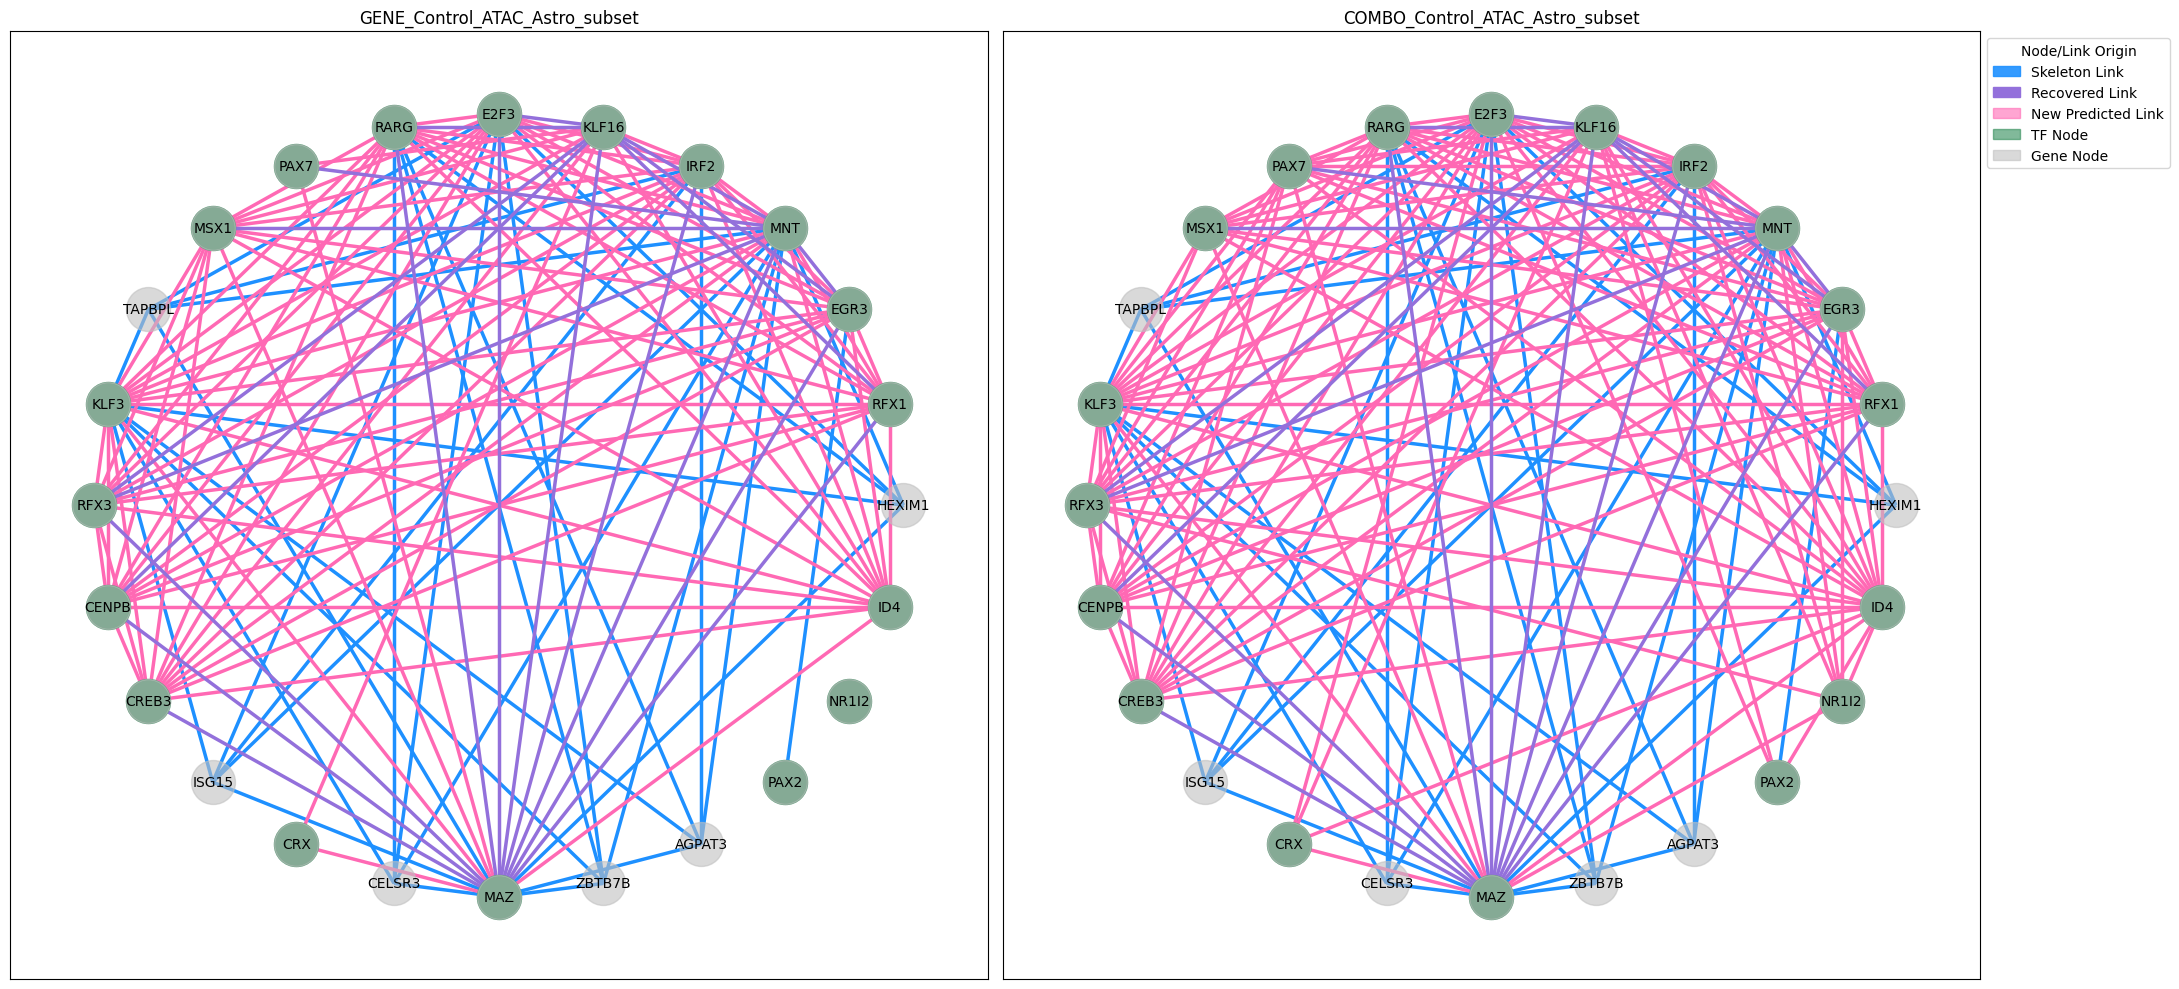

Control_ATAC_Exc_subset_AllPeaks (13, 14) (13, 14)
RNASEQ_Control_ATAC_Exc_subset_AllPeaks (13, 14) (13, 14)


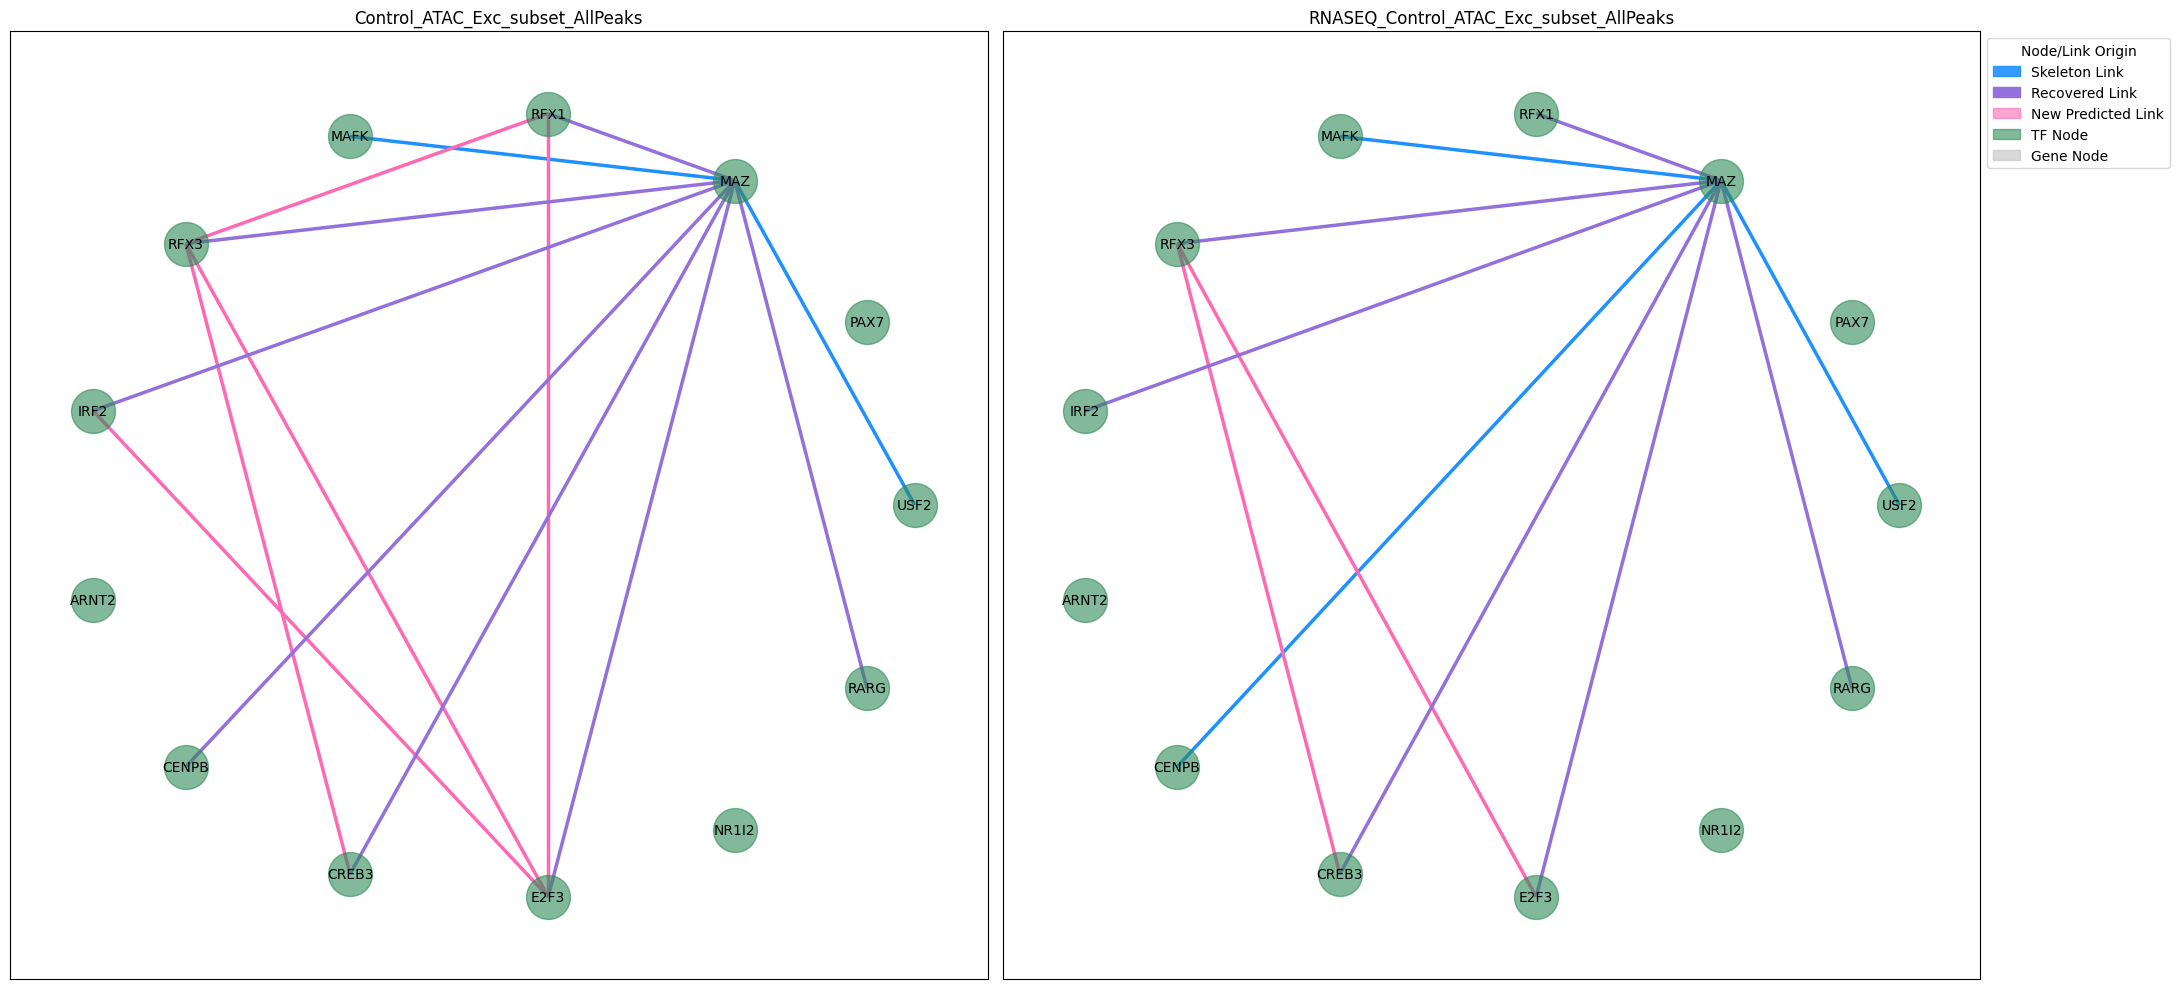

Control_ATAC_Astro_subset (18, 19) (18, 19)
RNASEQ_Control_ATAC_Astro_subset (18, 19) (18, 19)


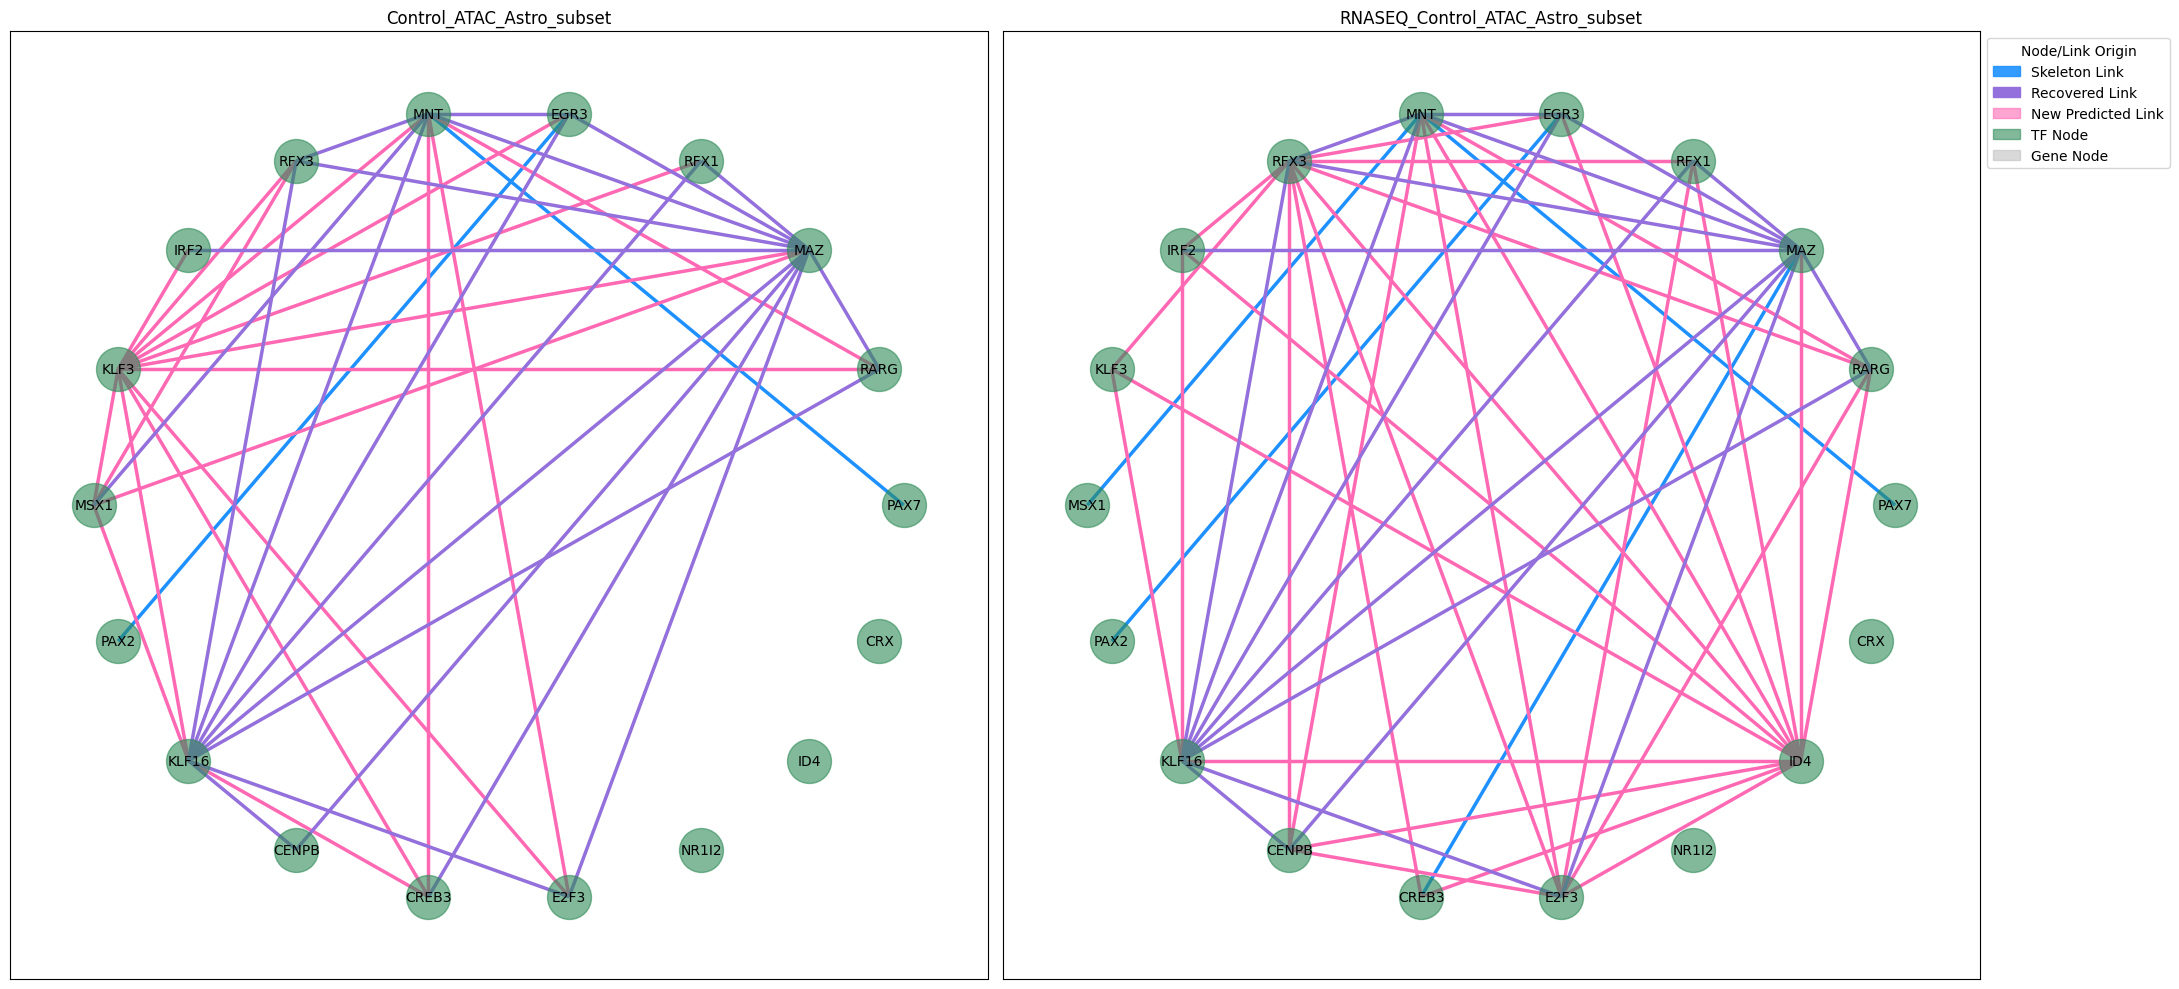

GENE_ALS_ATAC_Astro_subset (23, 24) (23, 24)
COMBO_ALS_ATAC_Astro_subset (23, 24) (23, 24)


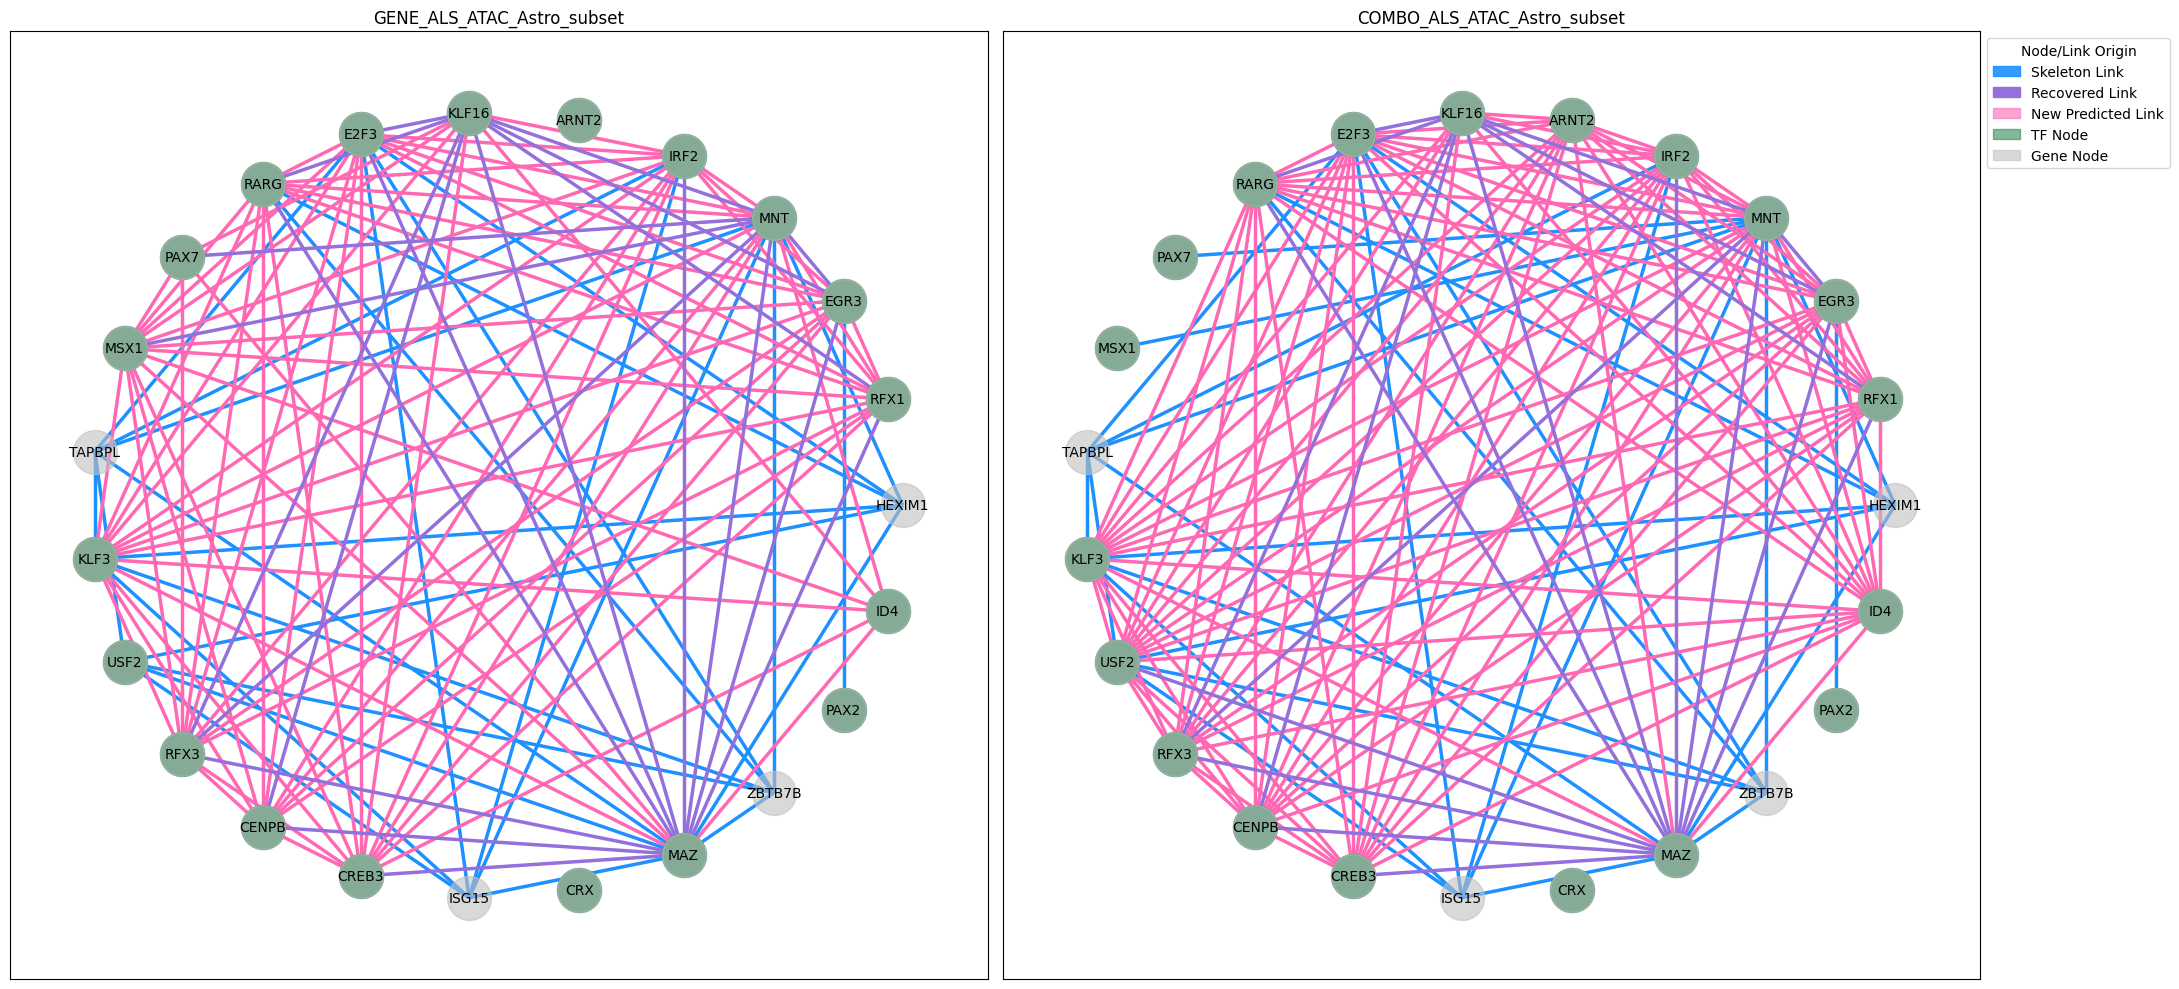

In [7]:
def generate_overlap_graph(ax, skeleton_file_path, trn_file_path, title, gene):
    df1 = pd.read_csv(skeleton_file_path, sep="\t")
    df2 = pd.read_csv(trn_file_path, sep="\t")
    print(title, df1.shape, df2.shape)

    G = nx.Graph()

    node_list1 = list(df1["TF"])
    node_list2 = list(df2["TF"])

    common_nodes = list(set(node_list1) & set(node_list2))
    G.add_nodes_from(common_nodes)

    for i, row in df1.iterrows():
        for tf in node_list1:
            if row[tf] > 0 and row['TF'] != tf:
                G.add_edge(row['TF'], tf, weight=1)
    
    common_edges = []
    for i, row in df2.iterrows():
        for tf in node_list2:
            if row[tf] > 0 and row['TF'] != tf:
                if G.has_edge(row['TF'], tf) and G[row['TF']][tf]['weight'] == 1:
                    common_edges.append((row['TF'], tf))
                else:
                    G.add_edge(row['TF'], tf, weight=2)

    for u, v in common_edges:
        if G.has_edge(u, v) and G[u][v]['weight'] == 1:
            G[u][v]['weight'] = 1.1

    pos = nx.circular_layout(G) 

    if gene == True:
        tfs_only = skeletons[skeleton_file_path]
        df0 = pd.read_csv(tfs_only, sep = "\t")
        tf_nodes = list(df0["TF"])
        nx.draw_networkx_nodes(G, pos, nodelist=tf_nodes, node_color='seagreen', node_size=1000, label="TF Node", alpha=1, ax=ax)
        nx.draw_networkx_nodes(G, pos, nodelist=common_nodes, node_color='silver', node_size=1000, label="TF Node", alpha=0.6, ax=ax)
    else: 
        nx.draw_networkx_nodes(G, pos, nodelist=common_nodes, node_color='seagreen', node_size=1000, label="TF Node", alpha=0.6, ax=ax)

    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if d.get('weight', 1) == 1], edge_color='dodgerblue', width=2.5, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if d.get('weight', 1) == 2], edge_color='hotpink', width=2.5, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if d.get('weight', 1) == 1.1], edge_color='mediumpurple', width=2.5, ax=ax)

    labels = {node: node for node in G.nodes()} 
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, ax=ax) 
    ax.set_title(title)

figures = {}
skeletons = {}

for file in os.listdir(initial_matrix_folder):
    if "list" not in file and ".DS" not in file:
        gene_version = "GENE_" + file
        skeleton_file_path = os.path.join(initial_matrix_folder, file)
        figures[skeleton_file_path] = []
        skeleton_title = file[:-4]
        
        if "GENE" in skeleton_title:
            skeleton = "_".join(skeleton_title.split("_")[:4])
        else:
            skeleton = "_".join(skeleton_title.split("_")[:3])
            skeletons[os.path.join(initial_matrix_folder, gene_version)] = skeleton_file_path

        for f in sorted(os.listdir(final_matrix_folder)):
            f_list = f.split("_")
            if "COMBO" in f:
                f_list[0] = "GENE"
            f_name = "_".join(f_list)
            if f_name.startswith(skeleton) and "binary" in f_name:
                trn_file_path = os.path.join(final_matrix_folder, f)
                figures[skeleton_file_path].append(trn_file_path)
            elif "RNASEQ" in f_name and skeleton in f_name and "binary" in f_name:
                trn_file_path = os.path.join(final_matrix_folder, f)
                figures[skeleton_file_path].append(trn_file_path)

for skeleton_file, trn_list in figures.items():
    if "GENE" not in skeleton_file:
        for trn in trn_list:
            if "GENE" in trn or "COMBO" in trn:
                trn_list.remove(trn)

for skeleton_file, trn_list in figures.items():
    gene = False
    skeleton_title = skeleton_file.split("/")[-1][:-4]
    
    if "GENE" in skeleton_file:
        trn_list.reverse()
        gene = True
    fig, axes = plt.subplots(1, len(trn_list), figsize=(20, 20/len(trn_list)))
    for ax, trn_file_path in zip(axes, trn_list):
        title = trn_file_path.split("/")[-1].split("_adj")[0]
        generate_overlap_graph(ax, skeleton_file, trn_file_path, title, gene)

    plt.tight_layout()
    legend_handles = [
        mpatches.Patch(color='dodgerblue', label='Skeleton Link', alpha = 0.9),
        mpatches.Patch(color='mediumpurple',label='Recovered Link'),
        mpatches.Patch(color='hotpink',label='New Predicted Link', alpha = 0.6),
        mpatches.Patch(color='seagreen',label='TF Node', alpha = 0.6),
        mpatches.Patch(color='silver',label='Gene Node', alpha = 0.6)
    ]
    plt.legend(title="Node/Link Origin", handles=legend_handles, bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()
